In [1192]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
import numpy as np
import os
import seaborn as sns
from sklearn import ensemble, tree, linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [1193]:
train= pd.read_csv('Downloads/boston-house-prices/train.csv')
test= pd.read_csv('Downloads/boston-house-prices/test.csv')

In [1194]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1195]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [1196]:
test_ID=test['Id']
test_ID

0       1461
1       1462
2       1463
3       1464
4       1465
5       1466
6       1467
7       1468
8       1469
9       1470
10      1471
11      1472
12      1473
13      1474
14      1475
15      1476
16      1477
17      1478
18      1479
19      1480
20      1481
21      1482
22      1483
23      1484
24      1485
25      1486
26      1487
27      1488
28      1489
29      1490
        ... 
1429    2890
1430    2891
1431    2892
1432    2893
1433    2894
1434    2895
1435    2896
1436    2897
1437    2898
1438    2899
1439    2900
1440    2901
1441    2902
1442    2903
1443    2904
1444    2905
1445    2906
1446    2907
1447    2908
1448    2909
1449    2910
1450    2911
1451    2912
1452    2913
1453    2914
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [1197]:
train.drop("Id",axis=1,inplace=True)
test.drop("Id",axis=1,inplace=True)

In [1198]:
ntrain = train.shape[0]
ntest = test.shape[0]

In [1199]:
y_train = train.SalePrice.values
y_train

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

In [1200]:
all_data = pd.concat((train, test)).reset_index(drop=True)

In [1201]:
all_data

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
5,796,566,320,NaN,1,1Fam,TA,No,732.0,0.0,...,WD,0,Pave,5,796.0,AllPub,40,1993,1995,2009
6,1694,0,0,NaN,3,1Fam,TA,Av,1369.0,0.0,...,WD,0,Pave,7,1686.0,AllPub,255,2004,2005,2007
7,1107,983,0,NaN,3,1Fam,TA,Mn,859.0,32.0,...,WD,0,Pave,7,1107.0,AllPub,235,1973,1973,2009
8,1022,752,0,NaN,2,1Fam,TA,No,0.0,0.0,...,WD,0,Pave,8,952.0,AllPub,90,1931,1950,2008
9,1077,0,0,NaN,2,2fmCon,TA,No,851.0,0.0,...,WD,0,Pave,5,991.0,AllPub,0,1939,1950,2008


In [1202]:
all_data.drop(['SalePrice'], axis=1, inplace=True)

In [1203]:
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2919, 79)


In [1204]:
#checking missing value
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na

1stFlrSF          0.000000
2ndFlrSF          0.000000
3SsnPorch         0.000000
Alley            93.216855
BedroomAbvGr      0.000000
BldgType          0.000000
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinSF1        0.034258
BsmtFinSF2        0.034258
BsmtFinType1      2.706406
BsmtFinType2      2.740665
BsmtFullBath      0.068517
BsmtHalfBath      0.068517
BsmtQual          2.774923
BsmtUnfSF         0.034258
CentralAir        0.000000
Condition1        0.000000
Condition2        0.000000
Electrical        0.034258
EnclosedPorch     0.000000
ExterCond         0.000000
ExterQual         0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
Fence            80.438506
FireplaceQu      48.646797
Fireplaces        0.000000
Foundation        0.000000
FullBath          0.000000
                   ...    
LotFrontage      16.649538
LotShape          0.000000
LowQualFinSF      0.000000
MSSubClass        0.000000
MSZoning          0.137033
MasVnrArea        0.787941
M

In [1205]:
all_data_na.shape

(79,)

In [1206]:
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
all_data_na

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
FireplaceQu     48.646797
LotFrontage     16.649538
GarageQual       5.447071
GarageCond       5.447071
GarageFinish     5.447071
GarageYrBlt      5.447071
GarageType       5.378554
BsmtExposure     2.809181
BsmtCond         2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
Utilities        0.068517
Functional       0.068517
Electrical       0.034258
BsmtUnfSF        0.034258
Exterior1st      0.034258
Exterior2nd      0.034258
TotalBsmtSF      0.034258
GarageArea       0.034258
GarageCars       0.034258
dtype: float64

In [1207]:
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(50)

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageQual,5.447071
GarageCond,5.447071
GarageFinish,5.447071
GarageYrBlt,5.447071


Text(0.5, 1.0, 'Percent missing data by feature')

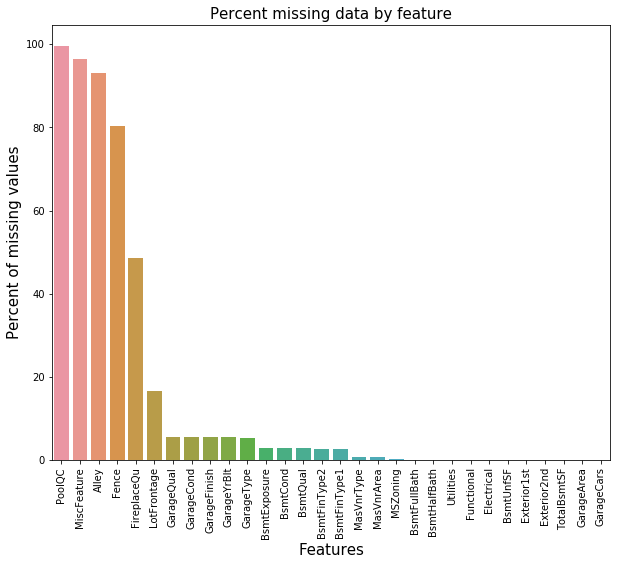

In [1208]:
 f,ax = plt.subplots(figsize=(10, 8))
 plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [1209]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [1210]:
# #Check remaining missing values if any 
# all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
# all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
# missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
# missing_data.head(5)

In [1211]:
# #MSSubClass=The building class
# all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
# #Changing OverallCond into a categorical variable
# all_data['OverallCond'] = all_data['OverallCond'].astype(str)
# #Year and month sold are transformed into categorical features.
# all_data['YrSold'] = all_data['YrSold'].astype(str)
# all_data['MoSold'] = all_data['MoSold'].astype(str)

In [1212]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'CentralAir','Alley', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))


Shape all_data: (2919, 78)


In [1213]:
#Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [1214]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2919, 221)


In [1215]:
print(all_data)

      1stFlrSF  2ndFlrSF  3SsnPorch  Alley  BedroomAbvGr  BsmtCond  \
0          856       854          0      1             3         4   
1         1262         0          0      1             3         4   
2          920       866          0      1             3         4   
3          961       756          0      1             3         1   
4         1145      1053          0      1             4         4   
5          796       566        320      1             1         4   
6         1694         0          0      1             3         4   
7         1107       983          0      1             3         4   
8         1022       752          0      1             2         4   
9         1077         0          0      1             2         4   
10        1040         0          0      1             3         4   
11        1182      1142          0      1             4         4   
12         912         0          0      1             2         4   
13        1494      

In [1216]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [1182]:
model=KNeighborsRegressor()

In [1183]:
model.fit(train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [1184]:
model.score(train,y_train)

0.7958699551406817

In [1185]:
model_x=model.predict(test)

In [1186]:
model_x

array([137690., 205680., 174360., ..., 182100., 106400., 250818.])

In [1217]:
model1=GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [1218]:
model1.fit(train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.05, loss='huber', max_depth=4,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=15, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='auto', random_state=5,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [1219]:
model1.score(train,y_train)

0.9702104528203137

In [1220]:
modelx1=model1.predict(test)

In [1221]:
modelx1

array([126539.5508085 , 160893.92707718, 190508.75264106, ...,
       158642.74006748, 113889.31745851, 211133.89007749])

In [1222]:
%%time
params_rf={
    
    'max_depth':[1],
    'min_samples_leaf': [1],
    'max_features': [1]
    
    
    
}
model2 = RandomForestRegressor(n_estimators=200,random_state=42,n_jobs=-1,max_depth=4,
                               min_samples_leaf=2,max_features=19)
model2.fit(train,y_train)


Wall time: 354 ms


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
                      max_features=19, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [1223]:
model2.score(train,y_train)

0.8316157102593744

In [1224]:
modelx2=model2.predict(test)

In [1225]:
modelx2

array([132195.5727995 , 151321.53446519, 185642.86965623, ...,
       160123.20546437, 136950.16181769, 217938.95402537])

In [1226]:
ensemble = modelx1+modelx2

In [1227]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission_27.csv',index=False)